# Tara UMAP

In [1]:
from importlib import reload
import os
import numpy as np
import pandas
import datetime

from matplotlib import pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy

import seaborn as sns

from oceancolor.tara import io
from oceancolor.tara import explore

# Load up spectra for plotting

In [7]:
rwv_nm, cull_raph, cull_rsig, tara_tbl = explore.prep_spectra()

/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:248: RuntimeWarning: invalid value encountered in divide
  isum = np.nansum(values[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:249: RuntimeWarning: invalid value encountered in divide
  esum = np.nansum(err_vals[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/explore.py:34: RuntimeWarning: divide by zero encountered in divide
  # Cut on S/N
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/explore.py:34: RuntimeWarning: invalid value encountered in divide
  # Cut on S/N


# Load up UMAP results (unnormalize)

In [8]:
umap_file = os.path.join(
        os.getenv('OS_COLOR'), 'Tara', 'UMAP', 'Tara_UMAP_abs.parquet')

In [9]:
umap_tbl = pandas.read_parquet(umap_file)

# Scatter me

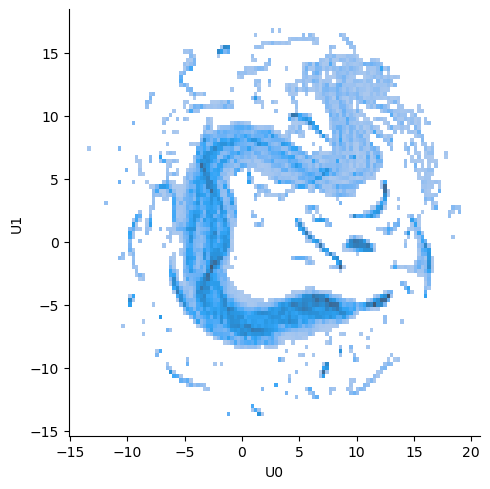

In [35]:
sns.displot(umap_tbl, x='U0', y='U1')

## Explore a few regions

In [28]:
def spec_from_region(region, utbl, navg:int=100):
    #
    dist2 = (utbl.U0-region[0])**2 + (utbl.U1-region[1])
    #
    top = np.argsort(dist2.values)[:navg]
    # Average
    avg_spec = np.mean(cull_raph[top,...], axis=0)
    # Return
    return avg_spec

## Grab em

In [42]:
specA = spec_from_region([0, -6], umap_tbl)
specB = spec_from_region([-3, 0.], umap_tbl)
specC = spec_from_region([-2, 6.], umap_tbl)
specD = spec_from_region([9, 6.], umap_tbl)
specE = spec_from_region([10, 12.5], umap_tbl)
# Rare ones
specF = spec_from_region([15, -1], umap_tbl)
specG = spec_from_region([12, -5], umap_tbl)


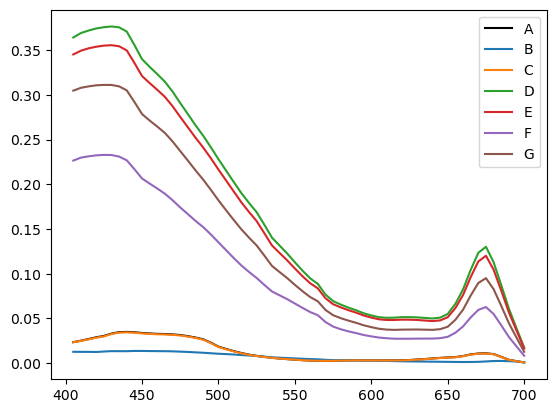

In [43]:
plt.clf()
ax = plt.gca()

ax.plot(rwv_nm, specA, 'k', label='A')
ax.plot(rwv_nm, specB, label='B')
ax.plot(rwv_nm, specC, label='C')
ax.plot(rwv_nm, specD, label='D')
ax.plot(rwv_nm, specE, label='E')

ax.plot(rwv_nm, specF, label='F')
ax.plot(rwv_nm, specG, label='G')

#
ax.legend()

plt.show()

----

# Normalized

In [45]:
reload(explore)
process = dict(Norm_PDF=True)
rwv_nm, cull_raph, cull_rsig, tara_tbl = explore.prep_spectra(process=process)

/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:248: RuntimeWarning: invalid value encountered in divide
  isum = np.nansum(values[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:249: RuntimeWarning: invalid value encountered in divide
  esum = np.nansum(err_vals[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/explore.py:35: RuntimeWarning: divide by zero encountered in divide
  med_sn = np.nanmedian(r_aph/r_sig, axis=1)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/explore.py:35: RuntimeWarning: invalid value encountered in divide
  med_sn = np.nanmedian(r_aph/r_sig, axis=1)


Normalizing the PDF


In [46]:
umap_fileN = os.path.join(
        os.getenv('OS_COLOR'), 'Tara', 'UMAP', 'Tara_UMAP_norm.parquet')
umap_tblN = pandas.read_parquet(umap_fileN)

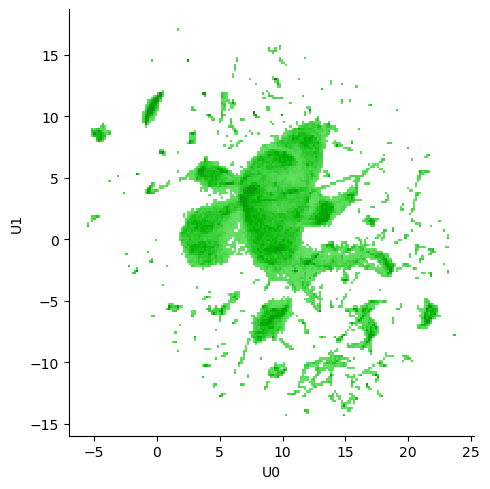

In [47]:
sns.displot(umap_tblN, x='U0', y='U1', color='green')

In [54]:
specNA = spec_from_region([10, 2.5], umap_tbl)
specNB = spec_from_region([4, 0.], umap_tbl)
specNC = spec_from_region([8, -6.], umap_tbl)
#
specND = spec_from_region([-4, 8.], umap_tbl, navg=30)
specNE = spec_from_region([22, -7], umap_tbl, navg=30)
specNF = spec_from_region([12, 8], umap_tbl)

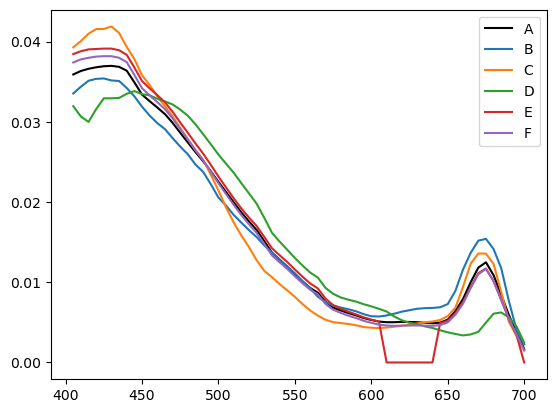

In [55]:
plt.clf()
ax = plt.gca()

ax.plot(rwv_nm, specNA, 'k', label='A')
ax.plot(rwv_nm, specNB, label='B')
ax.plot(rwv_nm, specNC, label='C')
ax.plot(rwv_nm, specND, label='D')
ax.plot(rwv_nm, specNE, label='E')

ax.plot(rwv_nm, specNF, label='F')
#ax.plot(rwv_nm, specG, label='G')

#
ax.legend()

plt.show()